,COUNTYNAME,TOWNNAME,宋,韓,蔡,有效票數
0,南投縣,中寮鄉,0.043976,0.417546,0.538479,9005
1,南投縣,仁愛鄉,0.034096,0.760716,0.205188,8212
2,南投縣,信義鄉,0.037816,0.619948,0.342236,8462
3,南投縣,南投市,0.050711,0.439870,0.509419,60677
4,南投縣,名間鄉,0.041537,0.354578,0.603885,23425
...,...,...,...,...,...,...
363,高雄市,阿蓮區,0.029219,0.278461,0.692320,18139
364,高雄市,鳥松區,0.032005,0.334282,0.633713,30214
365,高雄市,鳳山區,0.032010,0.361704,0.606286,227899
366,高雄市,鹽埕區,0.028173,0.326316,0.645511,16150


In [6]:
#投票率資料清理
def vote_rate(filename,country):
    df = pd.read_excel(filename, sheet_name=country)
    colrebuild = '第15任總統副總統選舉候選人在' + country + '各村(里)得票數一覽表'
    df2 = df[[colrebuild,'Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 12']]
    df3 = df2.rename({colrebuild: 'TOWNNAME', 'Unnamed: 1': 'VILLNAME', 'Unnamed: 2': '宋', 'Unnamed: 3': '韓','Unnamed: 4': '蔡', 'Unnamed: 5': '有效票數', 'Unnamed: 12': '投票率'}, axis=1)
    df4 = df3.drop([0, 1, 2, 3, 4])
    str_to_int_cols = ['宋','韓','蔡','有效票數']
    for col in str_to_int_cols:
        df4[col] = df4[col].str.replace(',', '').astype(int)
    df4['COUNTYNAME'] = country
    df4 = df4.groupby(by=['COUNTYNAME','TOWNNAME'],as_index=False).sum()
    df4['宋'] = df4['宋'] / df4['有效票數']
    df4['韓'] = df4['韓'] / df4['有效票數']
    df4['蔡'] = df4['蔡'] / df4['有效票數']
    return df4

In [7]:
import os
import re
import pandas as pd
os.chdir("C:\\Users\\caac1\\Desktop\\投票資訊\\總統-各投票所得票明細及概況(Excel檔)")
regex = re.compile(r'總統-A05-3-候選人得票數一覽表-各村里\((.+)\)')
count = 0
for filename in os.listdir(os.getcwd()):
    match = regex.search(filename)
    
    if match != None:
        df_each = vote_rate(filename,match.group(1))
        count = count + 1
        if count > 1:
            df = df.append(df_each)
        else:
            df = df_each
df=df.reset_index(drop=True)
df

,COUNTYNAME,TOWNNAME,宋,韓,蔡,有效票數
0,南投縣,中寮鄉,0.043976,0.417546,0.538479,9005
1,南投縣,仁愛鄉,0.034096,0.760716,0.205188,8212
2,南投縣,信義鄉,0.037816,0.619948,0.342236,8462
3,南投縣,南投市,0.050711,0.439870,0.509419,60677
4,南投縣,名間鄉,0.041537,0.354578,0.603885,23425
...,...,...,...,...,...,...
363,高雄市,阿蓮區,0.029219,0.278461,0.692320,18139
364,高雄市,鳥松區,0.032005,0.334282,0.633713,30214
365,高雄市,鳳山區,0.032010,0.361704,0.606286,227899
366,高雄市,鹽埕區,0.028173,0.326316,0.645511,16150


In [9]:
#地理資訊資料整理
import geopandas as gpd
import pandas as pd
import shapely

os.chdir("C:\\Users\\caac1\\Desktop\\地圖")
gpd_map=gpd.read_file('VILLAGE_MOI_1081121.shp',encoding='utf-8')
town_map = gpd_map.groupby(by=['COUNTYNAME','TOWNNAME'],as_index=False)
town_map=gpd.GeoDataFrame(
    town_map['geometry'].agg(lambda t:shapely.ops.unary_union(t))
)
#旗津區緯度20,不符合實際情況,可能來源資料有錯誤,將錯誤值刪除
town_map=town_map.drop(town_map.index[345])

    COUNTYNAME TOWNNAME                                           geometry
330        高雄市      三民區  POLYGON ((120.34487 22.63615, 120.34479 22.635...
331        高雄市      仁武區  POLYGON ((120.36193 22.66974, 120.36192 22.669...
332        高雄市      內門區  POLYGON ((120.47387 22.90682, 120.47388 22.906...
333        高雄市      六龜區  POLYGON ((120.59787 22.90167, 120.59806 22.901...
334        高雄市      前金區  POLYGON ((120.29619 22.61805, 120.29612 22.618...
335        高雄市      前鎮區  POLYGON ((120.32053 22.59121, 120.32055 22.591...
336        高雄市      大寮區  POLYGON ((120.43010 22.54151, 120.43007 22.541...
337        高雄市      大樹區  POLYGON ((120.40189 22.64377, 120.40192 22.643...
338        高雄市      大社區  POLYGON ((120.38039 22.73503, 120.38030 22.734...
339        高雄市      小港區  POLYGON ((120.35593 22.50428, 120.35490 22.505...
340        高雄市      岡山區  POLYGON ((120.31643 22.78675, 120.31644 22.786...
341        高雄市      左營區  POLYGON ((120.30865 22.65505, 120.30882 22.656...
342        高雄市      彌陀區  

In [10]:
#投票率與經緯度資料Mapping
df['COUNTYNAME']=df['COUNTYNAME'].str.strip()
df['TOWNNAME']=df['TOWNNAME'].str.strip()
town_map['COUNTYNAME']=town_map['COUNTYNAME'].str.strip()
town_map['TOWNNAME']=town_map['TOWNNAME'].str.strip()
df_map = town_map.merge(df,left_on=['COUNTYNAME','TOWNNAME'],right_on=['COUNTYNAME','TOWNNAME'])

Populating the interactive namespace from numpy and matplotlib


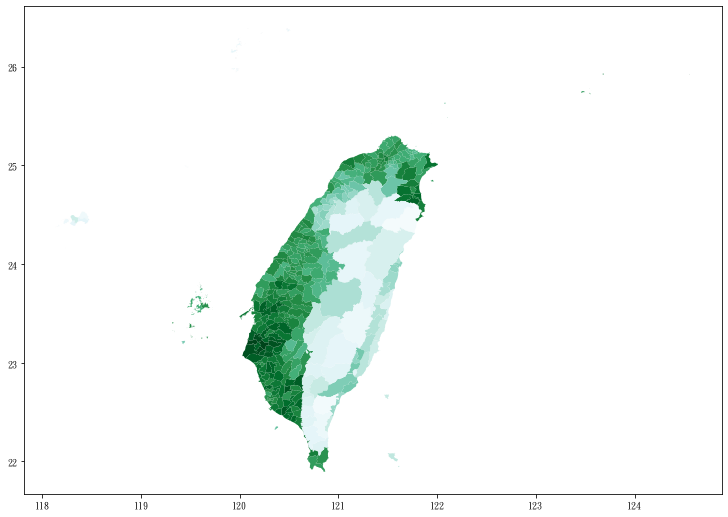

In [23]:
#資料視覺化
%pylab inline
pylab.rcParams['figure.figsize'] = (12.5,12.5)

df_map=df_map[df_map['COUNTYNAME'].isin(df['COUNTYNAME'].unique())]
df_map.plot(column='蔡',cmap='BuGn')